1. Create vocabulary
2. 
3. Vectorize data: each vector(TF/IDF) will represent a document
4. Similarity
5. Find number of clusters
6. Assign data to clusters.
7. Clusterise

stop words - words use to combine other words. They dont add meaning
// remove stop words
Term frequency ... 
Vectorising all documents
vocabulary: total number of unique words

when you get new data, you vectorize. 
then predict cluster where the data will fall

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [3]:
import pandas as pd
df = pd.read_csv('description.csv', na_values = '-',encoding='latin-1')

In [4]:
df.head()

,book_id,name,description
0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in..."
1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi..."
2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...
3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an..."
4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...


In [5]:
df.shape

(143, 3)

In [6]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,book_id,name,description
23,883.0,Confessions,NaN
53,1583.0,NaN,NaN
55,NaN,NaN,NaN
62,NaN,NaN,NaN
67,NaN,NaN,NaN
72,NaN,NaN,NaN
85,726.0,NaN,NaN
93,1541.0,NaN,NaN
98,4389.0,NaN,NaN
100,1570.0,NaN,NaN


In [7]:
null_rows.index

Index([ 23,  53,  55,  62,  67,  72,  85,  93,  98, 100, 101, 103, 107, 120,
       121, 124, 127, 132, 133, 135, 136],
      dtype='int64')

In [8]:
df = df.drop(null_rows.index)
df

,book_id,name,description
0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in..."
1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi..."
2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...
3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an..."
4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...
...,...,...,...
138,3549.0,The Scientist as Rebel (New York Review Books),"From Galileo to todays amateur astronomers, s..."
139,2307.0,The Life and Love of Dogs,"Once you have had a wonderful dog, a life with..."
140,690.0,Fish Tales: Stories & Recipes from Sustainable...,From the wild salmon caught in the Yukon river...
141,3329.0,Health: The Basics (11th Edition),This Edition of Donatelles text provides stud...


In [9]:
df.shape

(122, 3)

In [15]:
documents = df['description'].to_list()
documents

['A tender, moving tale of unconditional love in a family that, despite its profound flaws, gave the author the fiery determination to carve out a successful life on her own terms.\nJeannette Walls grew up with parents whose ideals and stubborn nonconformity were both their curse and their salvation. Rex and Rose Mary Walls had four children. In the beginning, they lived like nomads, moving among Southwest desert towns, camping in the mountains. Rex was a charismatic, brilliant man who, when sober, captured his children\'s imagination, teaching them physics, geology, and above all, how to embrace life fearlessly. Rose Mary, who painted and wrote and couldn\'t stand the responsibility of providing for her family, called herself an "excitement addict." Cooking a meal that would be consumed in fifteen minutes had no appeal when she could make a painting that might last forever. \nLater, when the money ran out, or the romance of the wandering life faded, the Walls retreated to the dismal W

Data processing: Extract relevant features to categorise books according to similarity of content

In [20]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [23]:
print(X)

  (0, 3755)	0.14036834082624047
  (0, 2497)	0.16536519019476098
  (0, 3720)	0.11524287184537717
  (0, 3922)	0.12925014368398974
  (0, 2268)	0.08011857943344082
  (0, 1438)	0.1930737618426975
  (0, 1055)	0.12136165727209136
  (0, 2959)	0.14036834082624047
  (0, 1510)	0.12925014368398974
  (0, 1622)	0.11524287184537717
  (0, 315)	0.04561838828784577
  (0, 1476)	0.14036834082624047
  (0, 1063)	0.12925014368398974
  (0, 584)	0.14036834082624047
  (0, 3647)	0.11024346012984064
  (0, 2211)	0.11783411390015466
  (0, 3758)	0.11524287184537717
  (0, 2075)	0.28073668165248095
  (0, 4044)	0.38775043105196916
  (0, 1709)	0.06068082863604568
  (0, 2710)	0.15353246057691342
  (0, 1884)	0.06068082863604568
  (0, 3631)	0.06462507184199487
  (0, 2581)	0.07018417041312024
  (0, 952)	0.07018417041312024
  :	:
  (121, 2262)	0.16918959090536256
  (121, 1462)	0.16918959090536256
  (121, 3942)	0.12255295239757423
  (121, 759)	0.14430967260634328
  (121, 4071)	0.14430967260634328
  (121, 1093)	0.1443096726063

In [25]:
terms = vectorizer.get_feature_names_out()

In [27]:
terms

array(['000', '10', '1000w', ..., 'zoe', 'zombie', 'zorich'], dtype=object)

In [29]:
vocabulary = vectorizer.vocabulary_
vocabulary

{'tender': 3755,
 'moving': 2497,
 'tale': 3720,
 'unconditional': 3922,
 'love': 2268,
 'family': 1438,
 'despite': 1055,
 'profound': 2959,
 'flaws': 1510,
 'gave': 1622,
 'author': 315,
 'fiery': 1476,
 'determination': 1063,
 'carve': 584,
 'successful': 3647,
 'life': 2211,
 'terms': 3758,
 'jeannette': 2075,
 'walls': 4044,
 'grew': 1709,
 'parents': 2710,
 'ideals': 1884,
 'stubborn': 3631,
 'nonconformity': 2581,
 'curse': 952,
 'salvation': 3286,
 'rex': 3218,
 'rose': 3254,
 'mary': 2342,
 'children': 656,
 'beginning': 389,
 'lived': 2237,
 'like': 2219,
 'nomads': 2579,
 'southwest': 3506,
 'desert': 1044,
 'towns': 3841,
 'camping': 555,
 'mountains': 2490,
 'charismatic': 635,
 'brilliant': 499,
 'man': 2311,
 'sober': 3473,
 'captured': 569,
 'imagination': 1898,
 'teaching': 3735,
 'physics': 2804,
 'geology': 1638,
 'embrace': 1260,
 'fearlessly': 1457,
 'painted': 2691,
 'wrote': 4159,
 'couldn': 891,
 'stand': 3557,
 'responsibility': 3193,
 'providing': 2984,
 'call

In [31]:
num_words = len(vocabulary)
num_words

4186

Training: Use the first 135 books to build the optimal number of clusters(Use the elbow method to deduce optimal number of clusters)

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test = train_test_split(X, test_size=0.05, random_state=42)

In [38]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [39]:
from kneed import KneeLocator
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++', max_iter=100, n_init=1, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
kl = KneeLocator(range(1,11), sse, curve='convex', direction="decreasing")

kl.elbow

6

In [40]:
import matplotlib.pyplot as plt

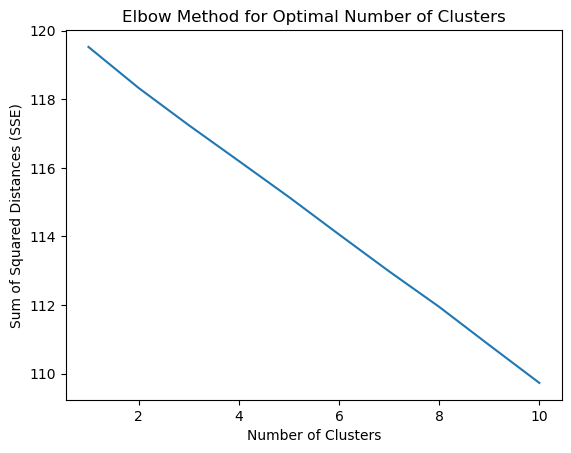

In [41]:
plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

In [42]:
# Use KneeLocator to find the elbow point
kneedle = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
optimal_clusters = kneedle.elbow
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 6


In [43]:
model = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=1)
model.fit(X_train)

KMeans(max_iter=100, n_clusters=6, n_init=1)

In [44]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[2830, 3681,  737, ..., 2639, 2638,    0],
       [2211, 3536, 2084, ..., 2616, 2615,    0],
       [ 463,  438, 3740, ..., 2671, 2670,    0],
       [2268, 2486, 4167, ..., 1868, 1867, 2092],
       [3599, 2849, 1438, ..., 2635, 2634, 2092],
       [ 656, 1205, 2065, ..., 2170, 2169, 4185]], dtype=int64)

In [45]:
for i in range(len(order_centroids)):
  print("Cluster",i)
  for j in order_centroids[i][:5]:
    print(terms[j])

Cluster 0
plastics
surgery
color
potato
book
Cluster 1
life
spiritual
jewish
heidegger
gandhi
Cluster 2
book
blake
techniques
yin
kwan
Cluster 3
love
mother
years
world
great
Cluster 4
story
political
family
war
life
Cluster 5
children
dyslexia
issues
irish
tracks


Testing: Predict the clusters for the remaining number of books

In [47]:
predictions = model.predict(X_test)

In [48]:
predictions

array([4, 3, 0, 5, 3, 0, 3])

Evaluation:Use the Rand Score to check the performance of your model

In [50]:
# not possible to use thi evaluation method because we dont have ground vALUES
# from sklearn.metrics import adjusted_rand_score
# rand_score = adjusted_rand_score(X_test, predictions)

In [51]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_test, predictions)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.0010693892900503193
